In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


# DATA LOADING & CHECKING

In [4]:
data = pd.read_csv("/kaggle/input/data-science-job-salaries/ds_salaries.csv", index_col = 0)

In [5]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [7]:
data.drop(['salary', 'salary_currency'], axis = 1, inplace = True)
data.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,NZ,50,NZ,S


In [8]:
data["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

<AxesSubplot:title={'center':'Distribution of Salary'}, xlabel='Salary'>

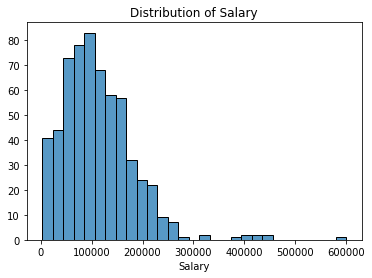

In [97]:
g = sns.histplot(data['salary_in_usd'])
g.set(xlabel = 'Salary', ylabel = '', title = 'Distribution of Salary')
g

In [9]:
data['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [109]:
fig = px.pie(data, values = data['work_year'].value_counts().values, names = data['work_year'].value_counts().index)

fig.show()

The type of employement for the role: 
* PT: Part-time
* FT: Full-time
* CT: Contract
* FL: Freelance

In [28]:
data['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [45]:
emp_type_avg = data.groupby('employment_type')['salary_in_usd'].mean().reset_index().round(3)
print(emp_type_avg)

  employment_type  salary_in_usd
0              CT     184575.000
1              FL      48000.000
2              FT     113468.073
3              PT      33070.500


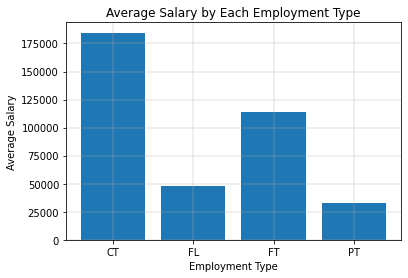

In [46]:
fig, ax = plt.subplots()
plt.bar(emp_type_avg['employment_type'], emp_type_avg['salary_in_usd'])
plt.grid(linewidth=0.4)

ax.set_title('Average Salary by Each Employment Type')
ax.set_xlabel('Employment Type')
ax.set_ylabel('Average Salary')

plt.show()

In [56]:
fig = px.box(data, x='employment_type',y='salary_in_usd', color = 'employment_type')
fig.update_layout(width = 900,height = 700)
fig.update_layout(showlegend=True )
fig.show()

In [93]:
data1 = data.groupby(['work_year', 'employment_type']).mean()
data1.reset_index(inplace = True)

fig = px.line(data1, x='work_year', y='salary_in_usd', color='employment_type', symbol="employment_type")

fig.update_layout(xaxis_title="Working Year", yaxis_title="Salary", title='Mean Salary Trend By Employment Type')
fig.show()

The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

The type of employement for the role: 
* EN: Entry-level
*  Junior MI: Mid-level
* Intermediate SE: Senior-level
* Expert EX: Executive-level

In [34]:
experience=data['experience_level'].value_counts()
fig=px.pie(names=experience.index,values=experience.values,color=experience.index)
fig.update_traces(textinfo='label+percent+value')
fig.show()

In [85]:
exp_lvl = data.groupby(['work_year', 'experience_level']).mean()
exp_lvl.reset_index(inplace = True)

fig = px.line(exp_lvl, x='work_year', y='salary_in_usd', color='experience_level', symbol="experience_level")
fig.update_layout(xaxis_title="Working Year",yaxis_title="Salary", title = 'Mean Salary Trend By Experience Level')

fig.show()

In [ ]:
"""
!pip install country_converter
import country_converter as coco
data.company_location = coco.convert(names=df.company_location, to='ISO3')

data_map = data.groupby('company_location')['work_year'].count()
data_map = pd.DataFrame(data_map)

data_map.columns = ['count']
data_map.reset_index(inplace=True)

fig = px.choropleth(data_map, locations="company_location", color='count', hover_name="company_location", color_continuous_scale=px.colors.sequential.Plasma)

fig.show()
"""